[32 26 38]
[27 45 36]
[14 11 14]
[24 30 34]
331


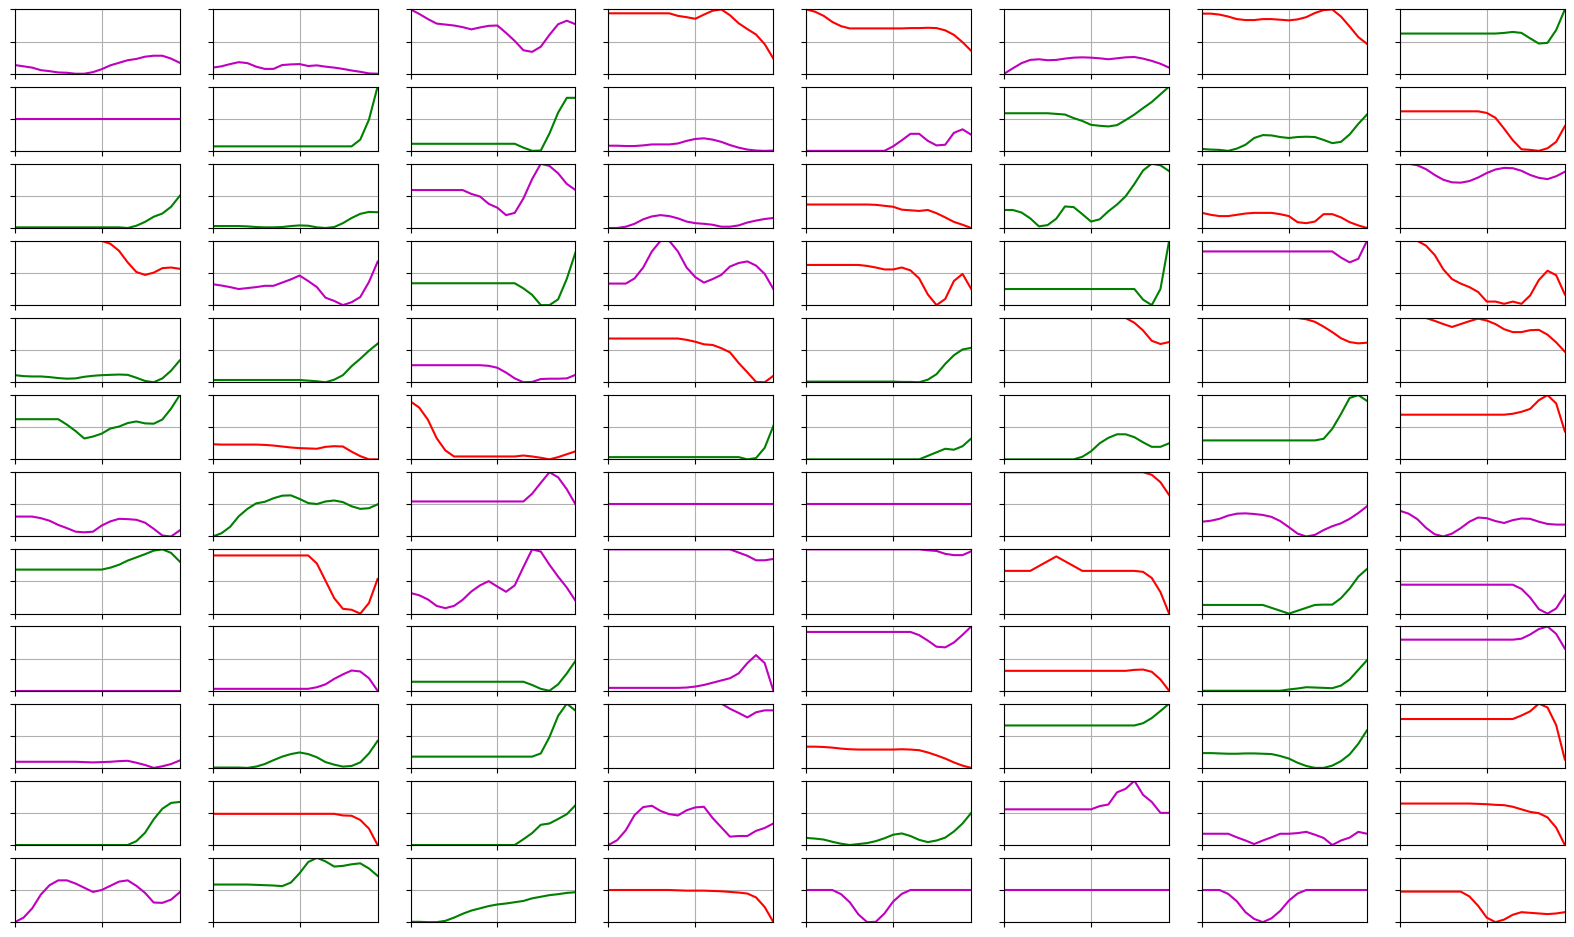

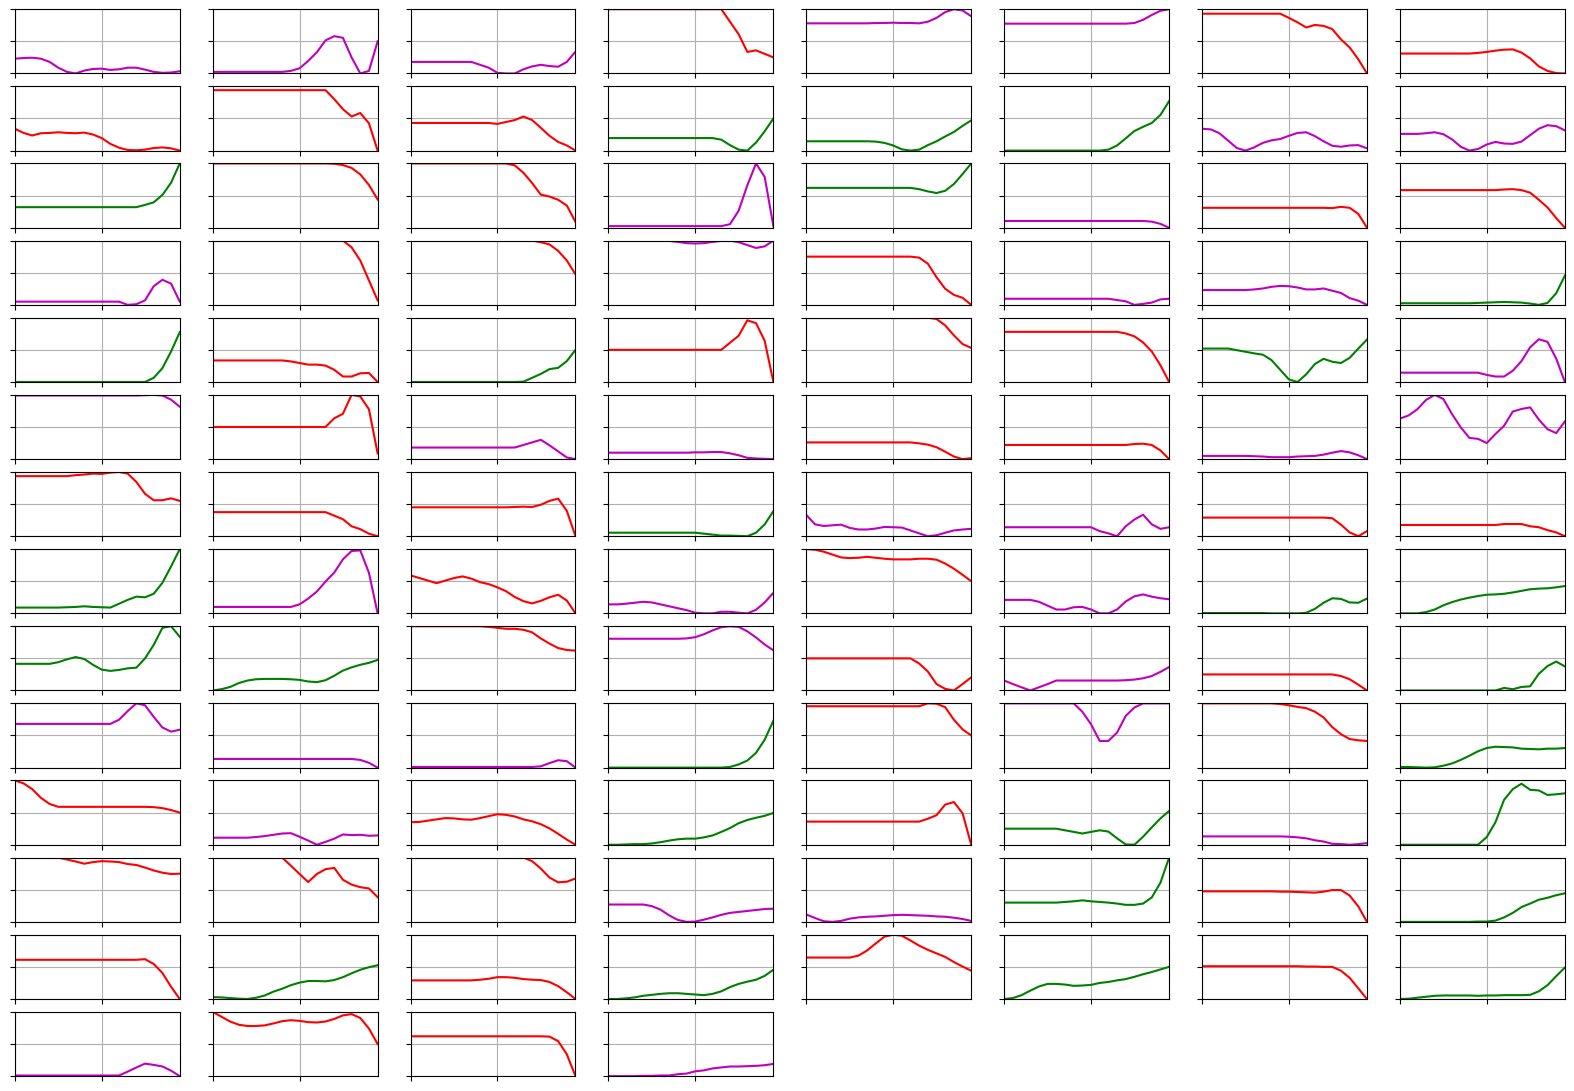

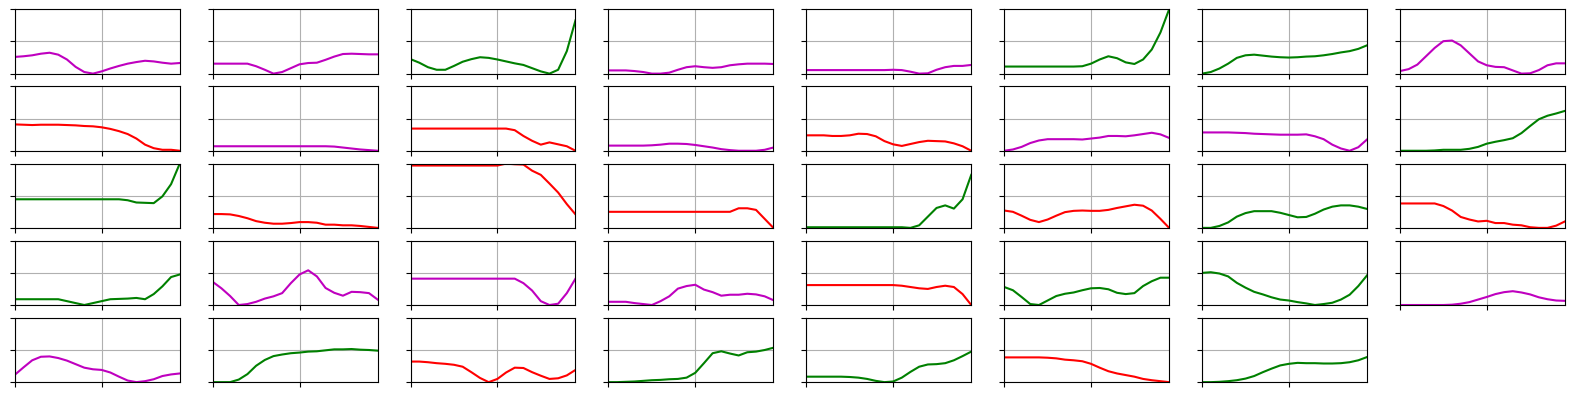

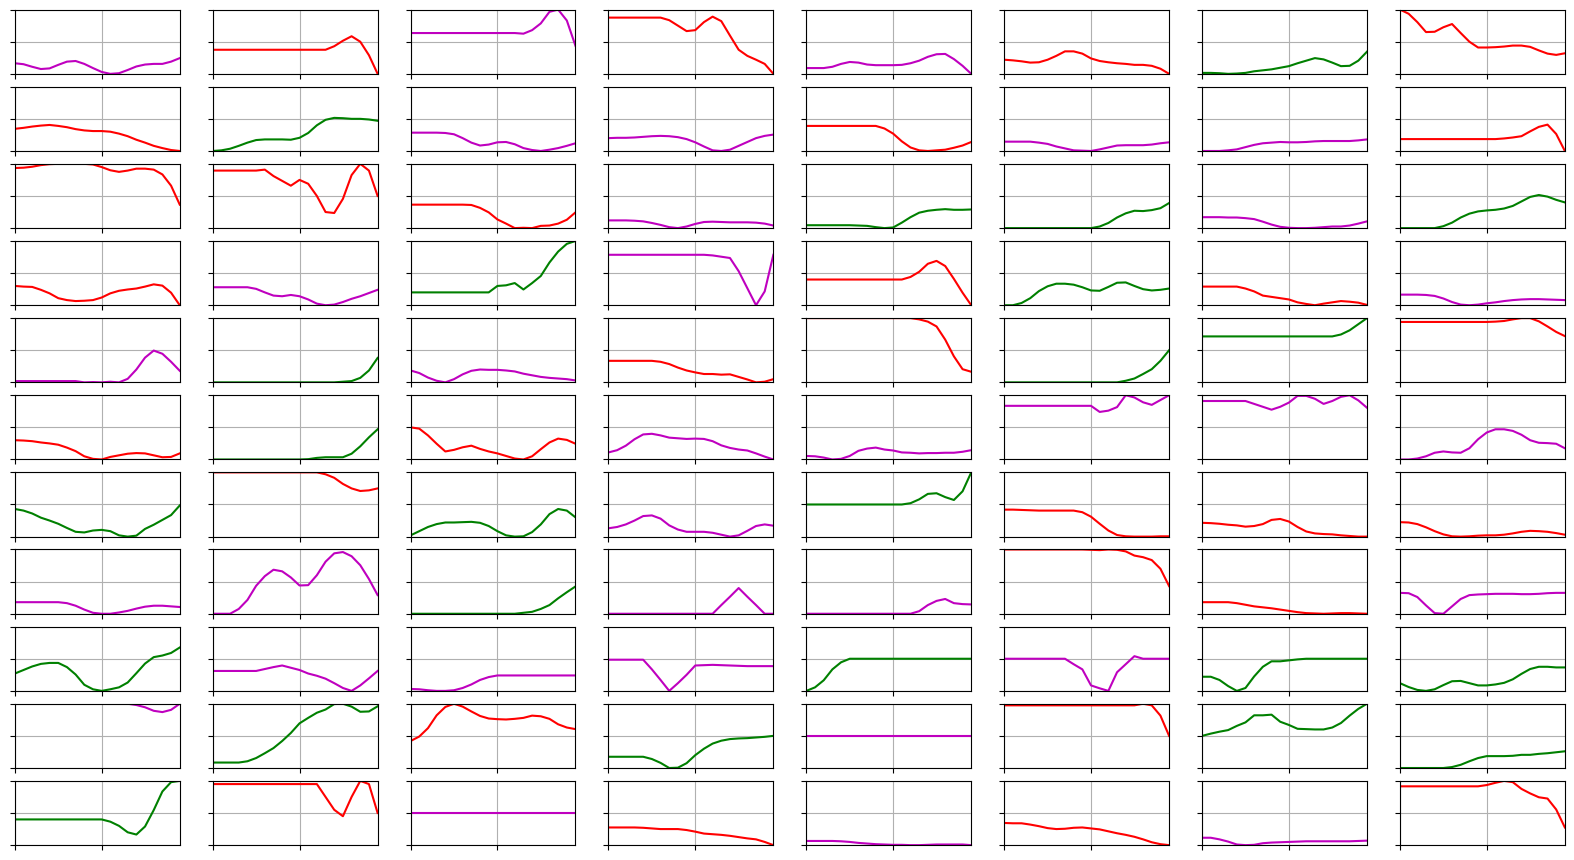

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def plotgame(name, colour):
    db = np.genfromtxt(f"{name}.csv", delimiter=",")
    fig = plt.figure(figsize=(20,100))
    # X is the data
    X = db[:,1:]
    Y = db[:,0]

    for i,x in enumerate(X):
        ax = fig.add_subplot(100,8,i+1)
        ax.set_xlim([0,19])
        ax.set_ylim([-1,1])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        if Y[i] == 0:
            ax.plot(x, "g-")
        elif Y[i] == 1:
            ax.plot(x, "r-")
        elif Y[i] == 2:
            ax.plot(x, "m-")
        else:
            ax.plot(x, "b-")

        ax.grid(True)

    # Z = []
    # for x in X:
    #     Z.append([np.mean(x[:10]), np.mean(x[10:])])
    # Z = np.array(Z)
    # plt.scatter(Z[:,0], Z[:,1], c=colour,alpha=0.75)
    return X, Y

X1, Y1 = plotgame("sf_torch", "b")
print(np.bincount(Y1.astype(int))) 
X2, Y2 = plotgame("sf_weiss", "b")
print(np.bincount(Y2.astype(int))) 
X3, Y3 = plotgame("me_ege", "g")
print(np.bincount(Y3.astype(int))) 
X4, Y4 = plotgame("me_random", "g")
print(np.bincount(Y4.astype(int))) 

Z = []
for x in X1:
    Z.append(x)
for x in X2:
    Z.append(x)
for x in X3:
    Z.append(x)
for x in X4:
    Z.append(x)

X = np.array(Z)

Y = np.append(Y1, Y2)
Y = np.append(Y, Y3)
Y = np.append(Y, Y4)


# labels = [1] * len(X1) + [2] * len(X2) + [3] * len(X3)
# plt.subplots_adjust(wspace=0, hspace=0)

print(len(Y))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy linear:       0.9156626506024096
0.9156626506024096


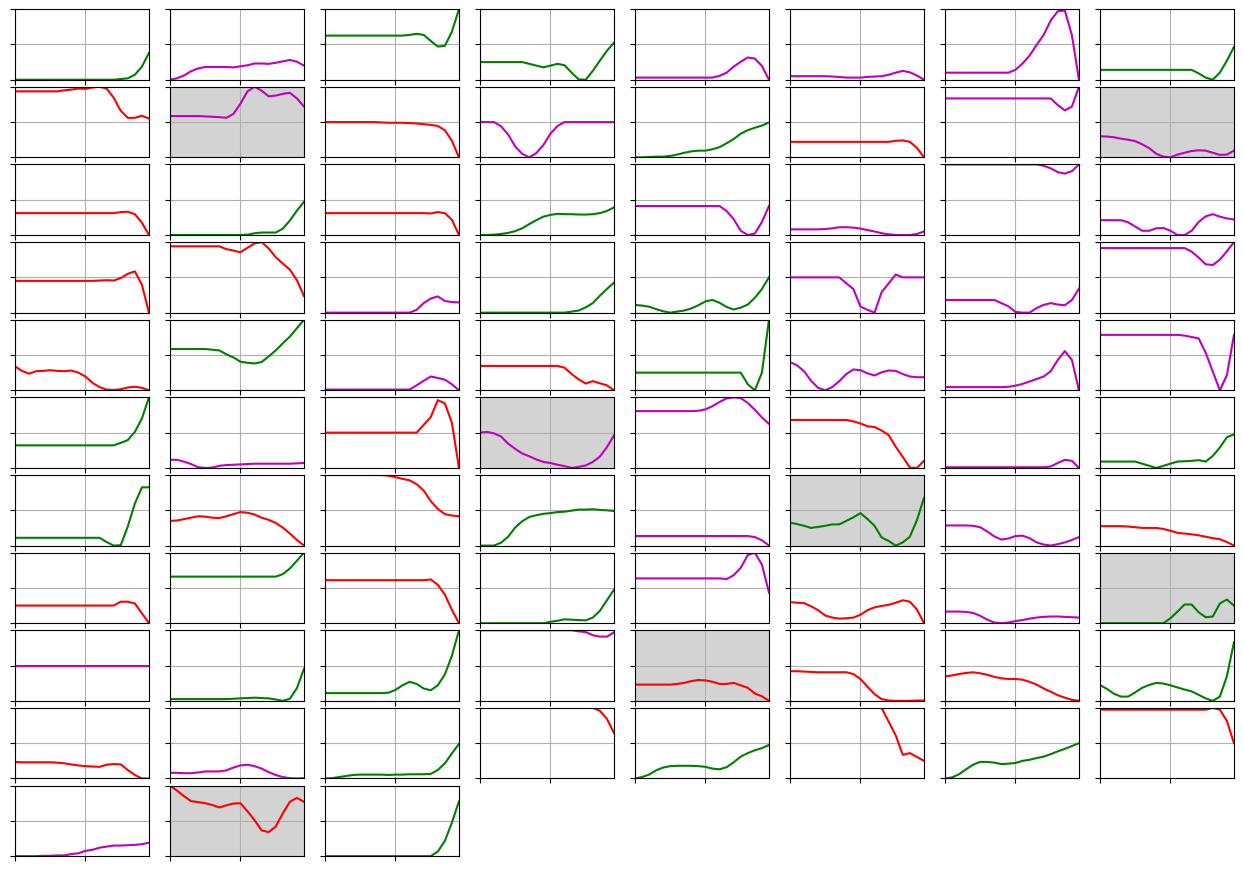

In [20]:
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

XTr, XTe, YTr, YTe = train_test_split(X, Y, random_state = 2)

# training a linear SVM classifier 
from sklearn.svm import SVC

clf = GridSearchCV(SVC(), {"kernel": ["linear"],
                           "C":      [0.5, 1.0, 2.0, 5.0],
                           "decision_function_shape": ["ovo", "ovr"],
                           "probability": [True],
                           }, verbose=True).fit(XTr, YTr)
print(f"Accuracy linear:       {clf.score(XTe, YTe)}")

svm_predictions = clf.predict(XTe) 
svm_predictions_proba = clf.predict_proba(XTe) 

accuracy = clf.score(XTe, YTe)

cm = confusion_matrix(YTe, svm_predictions)

print(accuracy)

fig = plt.figure(figsize=(16,((len(XTe)+7)//8)))

# X is the data
ex = XTe
pre = svm_predictions

for i,x in enumerate(ex):
    ax = fig.add_subplot((len(XTe)+7)//8,8,i+1)
    ax.set_xlim([0,19])
    ax.set_ylim([-1,1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect(5)
    if pre[i] == 0:
        ax.plot(x, "g-")
    elif pre[i] == 1:
        ax.plot(x, "r-")
    elif pre[i] == 2:
        ax.plot(x, "m-")
    else:
        ax.plot(x, "b-")
    ax.grid(True)
    if pre[i] != YTe[i]:
        ax.set_facecolor("lightgrey")

plt.subplots_adjust(wspace=0, hspace=0.1)